# 1 . Exploring the Datasets

In [8]:
import pandas as pd

diabetes_df = pd.read_csv('datasets/diabetes.csv')

diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [9]:
diabetes_df.shape

(768, 9)

Note: Every column can effect the result of diabetes, so we will not drop any column

In [10]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabetes_df.isna().sum()
#there is no null data

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes_df = diabetes_df.dropna()
diabetes_df.shape

#there is no need for this step since there is no Nan values

(768, 9)

In [13]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes_df[diabetes_df['BloodPressure'] == 0]['BloodPressure'].count()

35

There is 35 person who has 0 bloodPressure, which is not logic, so we will remove these rows with 0 bloodPressure, also for Skinthickness, insuline, glucose and BMI

In [15]:
diabetes_df = diabetes_df[diabetes_df['BloodPressure'] != 0]
diabetes_df = diabetes_df[diabetes_df['Insulin'] != 0]
diabetes_df = diabetes_df[diabetes_df['SkinThickness'] != 0]
diabetes_df = diabetes_df[diabetes_df['Glucose'] != 0]
diabetes_df = diabetes_df[diabetes_df['BMI'] != 0]



In [16]:
diabetes_df.shape

(392, 9)

In [17]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Visualizing using matplotlib

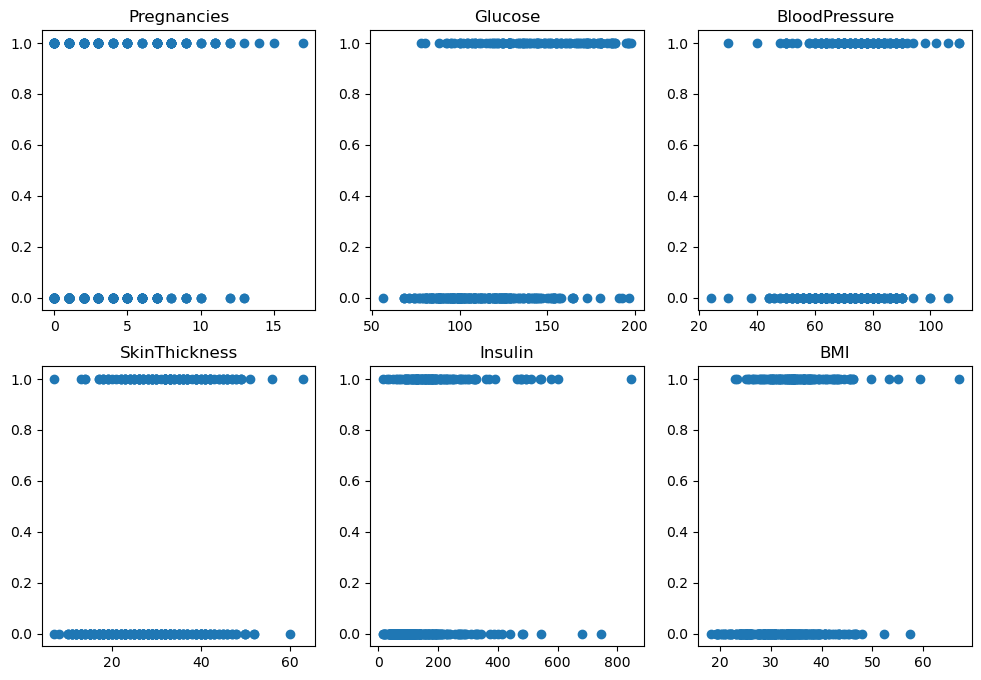

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,3, figsize=(12, 8))

ax[0,0].scatter(diabetes_df['Pregnancies'], diabetes_df['Outcome'])
ax[0,1].scatter(diabetes_df['Glucose'], diabetes_df['Outcome'])
ax[0,2].scatter(diabetes_df['BloodPressure'], diabetes_df['Outcome'])
ax[1,0].scatter(diabetes_df['SkinThickness'], diabetes_df['Outcome'])
ax[1,1].scatter(diabetes_df['Insulin'], diabetes_df['Outcome'])
ax[1,2].scatter(diabetes_df['BMI'], diabetes_df['Outcome'])

ax[0,0].set_title('Pregnancies')
ax[0,1].set_title('Glucose')
ax[0,2].set_title('BloodPressure')
ax[1,0].set_title('SkinThickness')
ax[1,1].set_title('Insulin')
ax[1,2].set_title('BMI')

plt.show()


by visualizing the data, we can see that high BMI and high Glucose may result 1, and lower BMI or lower Glucose results 0.


# model selection
## train-test-split

In [19]:
from sklearn.model_selection import train_test_split

x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [20]:
# print the shapes of the training and testing data
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (313, 8)
Shape of y_train: (313,)
Shape of X_test: (79, 8)
Shape of y_test: (79,)


## Logistic Regression first iteration

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [22]:
y_pred = logistic_model.predict(x_test)

Confusion Matrix :

In [23]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

diabetes_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
diabetes_crosstab

y_test,0,1
y_pred,,
0,56,6
1,5,12


### Precision and Recall

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.8607594936708861
precision_score :  0.7058823529411765
recall_score :  0.6666666666666666


In [25]:
TP = diabetes_crosstab[1][1]
TN = diabetes_crosstab[0][0]
FP = diabetes_crosstab[0][1]
FN = diabetes_crosstab[1][0]
accuracy_score_verified = (TP + TN) / (TP + FP + TN + FN)

accuracy_score_verified

0.8607594936708861

In [26]:
Fmeasure = 2*(prec*recall)/(prec + recall)
Fmeasure

0.6857142857142857

# Mutiple Classification Models

In [28]:
features = list(diabetes_df.columns[:-1])

features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def multiClassfication():
    logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)
    y_pred = logistic_model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("---LOGISTIC---")
    print("accuracy_score : ", acc)
    print("precision_score : ", prec)
    print("recall_score : ", recall)

    print("----------------------------")

    model = LinearDiscriminantAnalysis(solver='svd')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("---LinearDiscriminant---")
    print("accuracy_score : ", acc)
    print("precision_score : ", prec)
    print("recall_score : ", recall)

multiClassfication()

---LOGISTIC---
accuracy_score :  0.8607594936708861
precision_score :  0.7058823529411765
recall_score :  0.6666666666666666
----------------------------
---LinearDiscriminant---
accuracy_score :  0.8354430379746836
precision_score :  0.6470588235294118
recall_score :  0.6111111111111112


In [ ]:
#i need to add F-MEASURE